**Import Libraries**

In [22]:
from libraries import*
from B_simulation_NMR import  wX, Ispin, w0, delta_ppm, eta, CQ_M, Qeta, alpha, beta, gama, QPAS, Siso_ppm, Siso
from functions import fourier3, fourier5, Rabc


In [23]:
titles = ['z rotation', 'y rotation', 'x rotation']
df = [0]*len(titles)
set = 1             #which set to analyse
file_path = ('/home/shiva/WMU/PhD/Scripts/phd_project/Python/NMR/Data_simulation/')

for i, orientation in enumerate(titles):
    file_name = f'{orientation}_set{set}_B.csv'
    df[i] = pd.read_csv(file_path+file_name, index_col=0)

**Fit Sum Frequency**

┌───┬───────────────────────────────────────────────────┐
│   │         a         b         c         d         e │
├───┼───────────────────────────────────────────────────┤
│ a │         1   -0.0137 -1.74e-09   -0.0137 -2.78e-10 │
│ b │   -0.0137         1  1.08e-09   -0.0194 -7.54e-10 │
│ c │ -1.74e-09  1.08e-09         1  1.63e-08 -7.71e-11 │
│ d │   -0.0137   -0.0194  1.63e-08         1  2.07e-08 │
│ e │ -2.78e-10 -7.54e-10 -7.71e-11  2.07e-08         1 │
└───┴───────────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.441e-18 (chi2/ndof = 0.0)│              Nfcn = 155              │
│ EDM = 1.03e-19 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minim

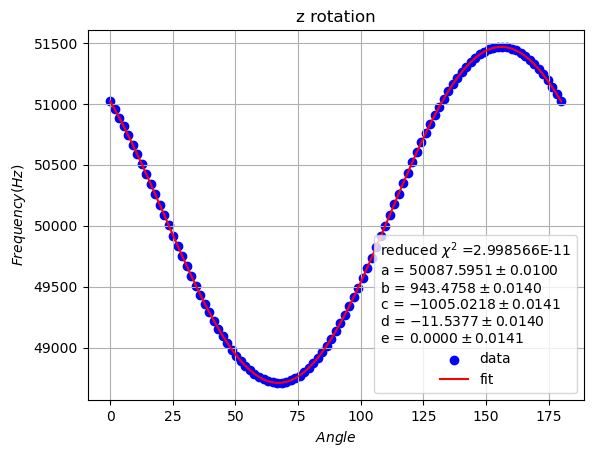

a = 50087.595066982714
b = 943.4758084455405
c = -1005.0217782702201
d = -11.537712538617784
e = 2.1643951297005657e-12
┌───┬───────────────────────────────────────────────────┐
│   │         a         b         c         d         e │
├───┼───────────────────────────────────────────────────┤
│ a │         1   -0.0137  4.14e-10   -0.0137 -3.86e-12 │
│ b │   -0.0137         1 -1.76e-09   -0.0194 -1.26e-10 │
│ c │  4.14e-10 -1.76e-09         1 -1.16e-09 -1.41e-09 │
│ d │   -0.0137   -0.0194 -1.16e-09         1  2.52e-12 │
│ e │ -3.86e-12 -1.26e-10 -1.41e-09  2.52e-12         1 │
└───┴───────────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.038e-18 (chi2/ndof = 0.0)│              Nfcn = 153              │
│ EDM = 3.01e-20 (Goal: 0.0002)    │                  

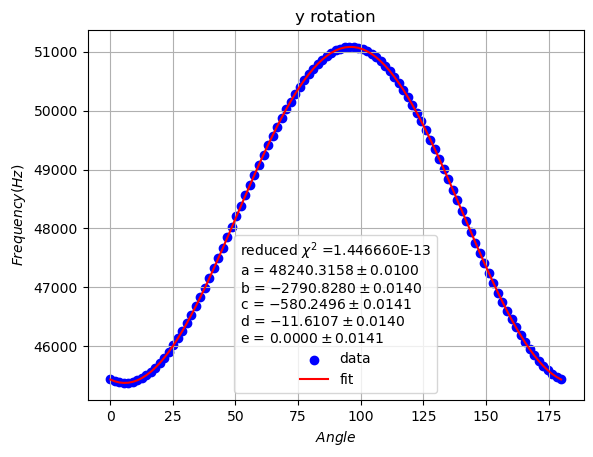

a = 48240.3158346514
b = -2790.827996296304
c = -580.2495942257467
d = -11.61066805807095
e = -1.483107832931839e-12
┌───┬───────────────────────────────────────────────────┐
│   │         a         b         c         d         e │
├───┼───────────────────────────────────────────────────┤
│ a │         1   -0.0137  2.69e-10   -0.0137  3.63e-12 │
│ b │   -0.0137         1  7.47e-10   -0.0194 -3.24e-10 │
│ c │  2.69e-10  7.47e-10         1 -2.01e-08  2.51e-10 │
│ d │   -0.0137   -0.0194 -2.01e-08         1  6.31e-12 │
│ e │  3.63e-12 -3.24e-10  2.51e-10  6.31e-12         1 │
└───┴───────────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.605e-18 (chi2/ndof = 0.0)│              Nfcn = 147              │
│ EDM = 1.34e-19 (Goal: 0.0002)    │                     

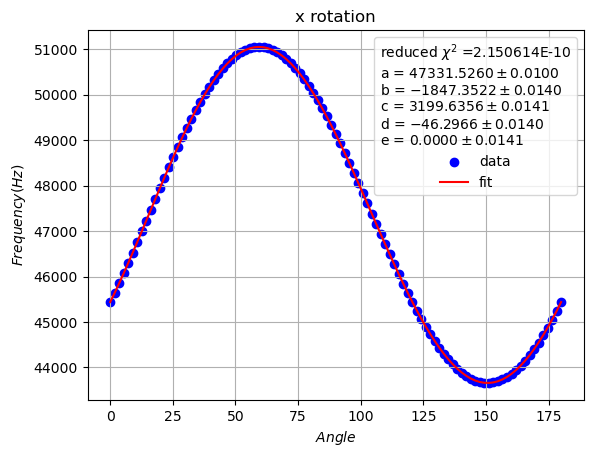

a = 47331.52600437588
b = -1847.352187850762
c = 3199.635641593105
d = -46.29664622809395
e = -4.112629201622054e-12


In [24]:
m_s = [0]*3
corr_mat = [0]*3



for i in range(3):
    least_squares = LeastSquares(df[i].angle, df[i].freq_sum, 0.1,fourier5)
    
    m_s[i] = Minuit(least_squares, a = 1, b = 1, c= 1, d = 0, e = 1).migrad()
    # m[i] = m[i].scan(ncall = 50)

    # m[i].migrad()  # finds minimum of least_squares function
    m_s[i].hesse()   # accurately computes uncertainties
    
    fit_info = [
        f"reduced $\\chi^2$ ={(m_s[i].fval / (len(df[i].angle) - m_s[i].nfit)):5E}"
    ]
    # print(fit_info)
    
    for p, v, e in zip(m_s[i].parameters, m_s[i].values, m_s[i].errors):
        fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")

    corr_mat = (m_s[i].covariance.correlation())
    print(corr_mat)
    print(m_s[i].migrad())
    # plt.imshow(corr_mat, cmap='coolwarm')
    
    # draw data and fitted line
    plt.scatter(df[i].angle, df[i].freq_sum, label="data", color = 'blue')
    plt.plot(df[i].angle, fourier5(df[i].angle, *m_s[i].values), label="fit", color = 'red')
    plt.xlabel(r'$Angle$')
    plt.ylabel(r'$Frequency (Hz)$')
    # plt.title(titles[i] +'\n'r'$Fitting\ of\ H^1_{CSA} = A + B(cos2\theta )+ C(sin2\theta)$')
    plt.title(titles[i])
    plt.legend(title="\n".join(fit_info))
    plt.grid()
    plt.show()
    
    for key, value in zip(m_s[i].parameters, m_s[i].values):
        print(f"{key} = {value}")

**Fit Difference Frequency**

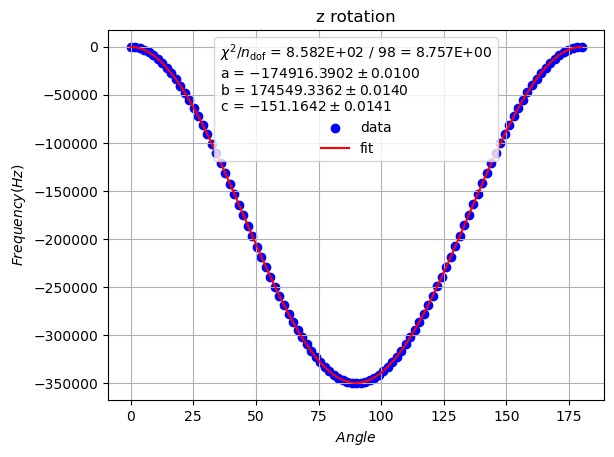

a = -174916.39022163057
b = 174549.3361949167
c = -151.16416419795453


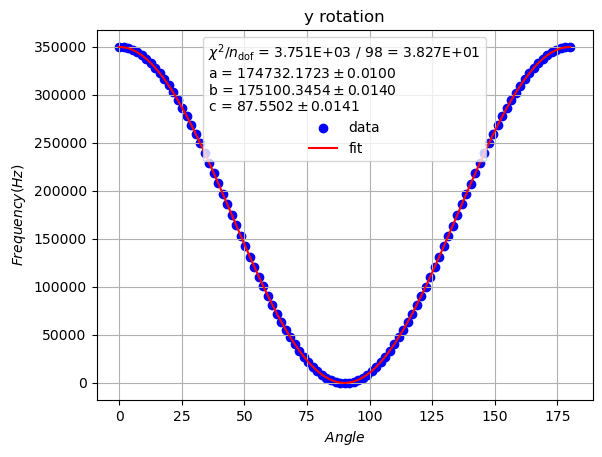

a = 174732.17232727367
b = 175100.345431775
c = 87.55016458556672


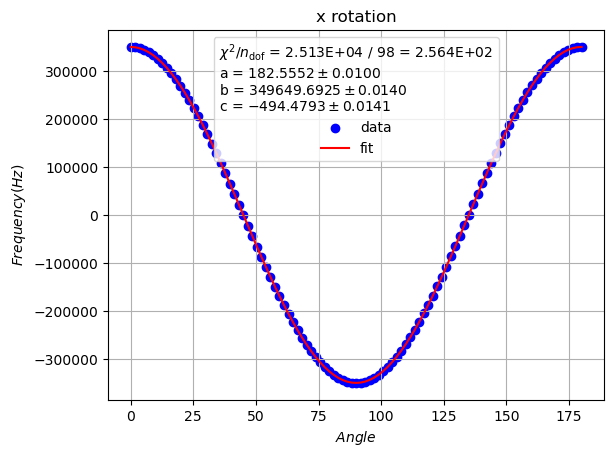

a = 182.55518499248524
b = 349649.6925440269
c = -494.4793068402642


In [25]:
m_d = [0]*3

for i in range(3):
    least_squares = LeastSquares(df[i].angle, df[i].freq_diff, 0.1,fourier3)
    
    m_d[i] = Minuit(least_squares, a = -0, b = -0, c= 0)
    # m_d[i].fixed["c"] = True
    # m_d[i].fixed["b"] = True
    # m[i] = m[i].scan(ncall = 50)

    m_d[i].migrad()  # finds minimum of least_squares function
    m_d[i].hesse()   # accurately computes uncertainties
    fit_info = [
        f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_d[i].fval:.3E} / {m_d[i].ndof:.0f} = {m_d[i].fmin.reduced_chi2:.3E}",
    ]
    # print(fit_info)
    

    for p, v, e in zip(m_d[i].parameters, m_d[i].values, m_d[i].errors):
        fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")

    corr_mat = (m_d[i].covariance.correlation())
    # print(corr_mat)
    # print(m_d[i].migrad())
    # plt.imshow(corr_mat, cmap='coolwarm')
    
    # draw data and fitted line
    plt.scatter(df[i].angle, df[i].freq_diff, label="data", color = 'blue')
    plt.plot(df[i].angle, fourier3(df[i].angle, *m_d[i].values), label="fit", color = 'red')
    # plt.plot(df[i].angle, HQ1[i], label = 'input ')
    plt.xlabel(r'$Angle$')
    plt.ylabel(r'$Frequency (Hz)$')
    # plt.title(titles[i] +'\n'r'$Fitting\ of\ H^1_{CSA} = A + B(cos2\theta )+ C(sin2\theta)$')
    plt.title(titles[i])
    plt.legend(title="\n".join(fit_info))
    plt.grid()
    plt.show()
    
    for key, value in zip(m_d[i].parameters, m_d[i].values):
        print(f"{key} = {value}")

**Find HQ1**

[-367.05402671388583, -349465.72641654726, 349832.5177590487]


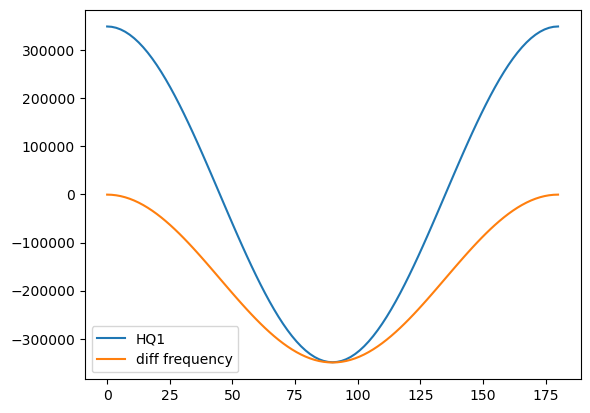

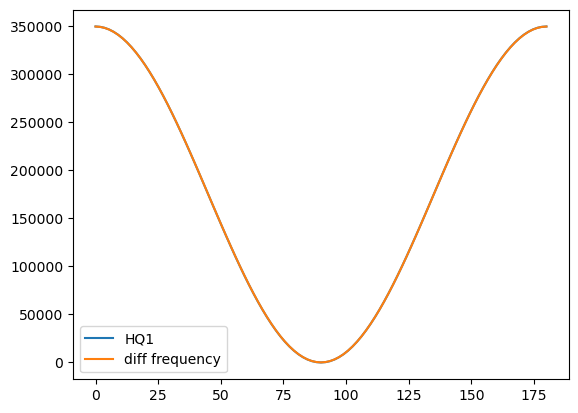

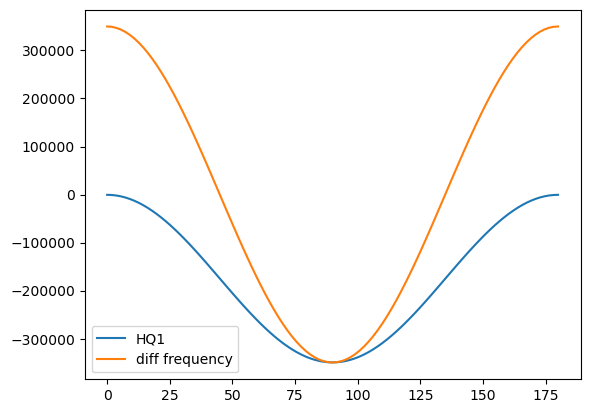

In [26]:
a_s = [0]*3; a_d = [0]*3
b_s = [0]*3; b_d = [0]*3
c_s = [0]*3; c_d = [0]*3
d_s = [0]*3
e_s = [0]*3

par_s = [a_s, b_s, c_s, d_s, e_s]
par_d = [a_d, b_d, c_d]

for i in range(0,3):
    for k in range(len(par_s)):
        par_s[k][i] = m_s[i].values[k]
    for j in range(len(par_d)):
        par_d[j][i] = m_d[i].values[j]
# Quadrupolar coefficients
A_Q = [0]*3
B_Q = [0]*3
C_Q = [0]*3

A_HQ1 = [0]*3
B_HQ1 = [0]*3
X = [0]*3
# https://stackoverflow.com/questions/36354807/solving-linear-equations-w-three-variables-using-numpy

for i in range(0,3):
    A_HQ1[i] = np.array([[1/2, 1/2], [1/2, -1/2]])
    B_HQ1[i] = np.array([a_d[i], b_d[i]])
    X[i] = np.linalg.inv(A_HQ1[i]).dot(B_HQ1[i])

gxx_q = X[0][0]
gyy_q= X[0][1]
gxy_q = -c_d[0]

gzz_q = X[1][0]
gxz_q = c_d[1]

gyz_q = -c_d[2]

Q_offdia = [ gxy_q, gxz_q, gyz_q]
Q_dia = [gxx_q, gyy_q, gzz_q]
print(Q_dia)

A_Q = np.array([gzz_q + gyy_q, gzz_q + gxx_q, gxx_q + gyy_q])*1/2
B_Q = np.array([gzz_q - gyy_q, gzz_q - gxx_q, gxx_q - gyy_q ])*1/2
C_Q = np.array([-gyz_q, gxz_q, -gxy_q])

HQ1= [0]*3

for i in range(3):
   HQ1[i] = A_Q[i] + B_Q[i]*np.cos(2*df[i].angle*np.pi/180.) + C_Q[i]*np.cos(2*df[i].angle*np.pi/180.) 

   #Plot to check that difference frequency is mostly HQ1
   plt.plot(df[i].angle, HQ1[i], label = 'HQ1')
   plt.plot(df[i].angle, df[i].freq_diff, label = 'diff frequency')
   plt.legend()
   plt.show()

**Verify Tensor Components from HQ2**

In [38]:

Dx = (-21/16*(gzz_q - gyy_q)**2 + 21/4*gyz_q**2)/(72*wX)
Ex = 21/4*(gzz_q - gyy_q)*gyz_q/(72*wX)

Dy = (-21/16*(gzz_q - gxx_q)**2 + 21/4*gxz_q**2)/(72*wX)
Ey = (-21/4*gxz_q*(gzz_q - gxx_q))/(72*wX)

Dz = (-21/16*(gxx_q - gyy_q)**2 + 21/4*gxy_q**2)/(72*wX)
Ez = (21/4*gxy_q*(gxx_q - gyy_q))/(72*wX)

table = [['Dx', d_s[2], Dx],  ['Ex', e_s[2], Ex],['Dy', d_s[1], Dy],  ['Ey', e_s[1], Ey], ['Dz', d_s[0], Dz],  ['Ez', e_s[0], Ez]]
print(tabulate(table, headers=['Coefficient','Coefficients from fit', 'Calculated coefficients']))

Coefficient      Coefficients from fit    Calculated coefficients
-------------  -----------------------  -------------------------
Dx                       -46.2966                     -46.2964
Ex                        -4.11263e-12                  0.130946
Dy                       -11.6107                     -11.6106
Ey                        -1.48311e-12                 -0.0116106
Dz                       -11.5377                     -11.5377
Ez                         2.1644e-12                   0.0199839


**Find HQ2**

In [ ]:
A = [0]*3
B = [0]*3
C = [0]*3
D = [0]*3
E = [0]*3
# x coefficients
A[2] = (3/64*(gzz_q + gyy_q)**2 + 3/128*(gyy_q-gzz_q)**2 + 3/32*gyz_q**2 + 1/8*gxz_q**2 + 1/8*gxy_q**2)/wX
B[2] = (1/32*(gyy_q**2 - gzz_q**2) -1/24*gxy_q**2 + 1/24*gxz_q**2)/wX
C[2] = (1/16*(gzz_q + gyy_q)*gyz_q - 1/12*gxz_q*gxy_q)/wX
D[2] = Dx
E[2] = Ex

#y coefficients
A[1] = (3/64*(gzz_q + gxx_q)**2 + 3/128*(gxx_q-gzz_q)**2 + 3/32*gxz_q**2 + 1/8*gyz_q**2 + 1/8*gxy_q**2)/wX
B[1] = (1/32*(gxx_q**2 - gzz_q**2) - 1/24*gxy_q**2 + 1/24*gyz_q**2)/wX
C[1] = (-1/16*(gzz_q + gxx_q)*gxz_q + 1/12*gyz_q*gxy_q)/wX
D[1] = Dy
E[1] = Ey

#z coefficients
A[0] = (3/64*(gyy_q + gxx_q)**2 + 3/128*(gxx_q-gyy_q)**2 + 3/32*gxy_q**2 + 1/8*gxz_q**2 + 1/8*gyz_q**2)/wX
B[0] = (-1/32*(gyy_q**2 - gxx_q**2) + 1/24*gxz_q**2 - gyz_q**2)/wX
C[0] = (1/16*(gyy_q + gxx_q)*gxy_q - 1/12*gxz_q*gyz_q)/wX
D[0] = Dz  
E[0] = Ez

HQ2 = [0]*3
for i in range(0,3):
    HQ2[i] = A[i] + B[i]*np.cos(2*df[i].angle*np.pi/180.) + C[i]*np.sin(2*df[i].angle*np.pi/180.) + D[i]*np.cos(4*df[i].angle*np.pi/180.) + E[i]*np.sin(4*df[i].angle*np.pi/180.)


**Find HCSA1**

In [ ]:
A_csa = [0]*3
B_csa = [0]*3
C_csa = [0]*3

for i in range(0,3):
    # A[i]=A[i]
    # B[i]=B[i]
    # C[i]=C[i]
    A_csa[i] = a_s[i] - A[i]
    B_csa[i] = b_s[i] - B[i]
    C_csa[i] = c_s[i] - C[i]

**Find CSA**

In [ ]:
m_csa = [0]*3
y_csa = [0]*3
# y_csa[0] = np.subtract(f_s[0], HQ2[0]) 
# print(f_s[0], HQ2[0], y_csa[0])
# 
for i in range(0,3):
    y_csa[i] = np.subtract(df[i].freq_sum, HQ2[i])    
    least_squares = LeastSquares(df[i].angle, y_csa[i], 1,fourier5)
    
    m_csa[i] = Minuit(least_squares, a = -1, b = -1, c= -1, d =1, e = 1)
    # m[i] = m[i].scan(ncall = 50)

    m_csa[i].migrad()  # finds minimum of least_squares function
    m_csa[i].hesse()   # accurately computes uncertainties
    fit_info = [
        f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_csa[i].fval:.5f} / {len(df[i].angle) - m_csa[i].nfit}",
    ]
    # print(fit_info)
    

    for p, v, e in zip(m_csa[i].parameters, m_csa[i].values, m_csa[i].errors):
        fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")

    corr_mat = (m_csa[i].covariance.correlation())
    print(corr_mat)
    print(m_csa[i].migrad())
    # plt.imshow(corr_mat, cmap='coolwarm')
    
    # draw data and fitted line
    plt.scatter(df[i].angle, y_csa[i], label="data", color = 'blue')
    plt.plot(df[i].angle, fourier5(df[i].angle, *m_csa[i].values), label="fit", color = 'red')
    plt.xlabel(r'$Angle$')
    plt.ylabel(r'$Frequency (Hz)$')
    # plt.title(titles[i] +'\n'r'$Fitting\ of\ H^1_{CSA} = A + B(cos2\theta )+ C(sin2\theta)$')
    plt.title(titles[i])
    plt.legend(title="\n".join(fit_info))
    plt.grid()
    plt.show()
    
    for key, value in zip(m_csa[i].parameters, m_csa[i].values):
        print(f"{key} = {value}")

a_csa = [0]*3; 
b_csa = [0]*3; 
c_csa = [0]*3; 
d_csa = [0]*3
e_csa = [0]*3
par_csa = [a_csa, b_csa, c_csa, d_csa, e_csa]

for i in range(0,3):
    for k in range(len(par_csa)):
        par_csa[k][i] = m_csa[i].values[k]

In [ ]:
A= [0]*3
B = [0]*3
C = [0]*3
A_HCSA1 = [0]*3
B_HCSA1 = [0]*3
X = [0]*3


for i in range(0,3):

    A_HCSA1[i] = np.array([[3/2, 3/2], [3/2, -3/2]])
    B_HCSA1[i] = np.array([a_csa[i], b_csa[i]])
    X[i] = np.linalg.inv(A_HCSA1[i]).dot(B_HCSA1[i])
    

gxx_csa = X[0][0]
gyy_csa= X[0][1]
gxy_csa = -c_csa[0]/(3)

gzz_csa = X[1][0]
gxz_csa = c_csa[1]/(3)

gyz_csa = -c_csa[2]/(3)


print(tabulate([['gxx_q',gxx_q], ['gyy_q',gyy_q], ['gzz_q',gzz_q], ['gxy_q',gxy_q], ['gyz_q',gyz_q], ['gxz_q',gxz_q],['gxx_csa',gxx_csa], ['gyy_csa',gyy_csa], ['gzz_csa',gzz_csa], ['gxy_csa',gxy_csa], ['gyz_csa',gyz_csa], ['gxz_csa',gxz_csa]]))

In [ ]:
print(QPAS)
print(gxx_q+gyy_q+gzz_q)

**Check Input**

In [ ]:
#****** Input Vaue****************
#coupling values for NAV (taken from paper https://pubmed.ncbi.nlm.nih.gov/22027340/)


#for CSA
Siso_fit = (gxx_csa + gyy_csa + gzz_csa)/3
Siso_ppm_fit = Siso_fit/w0
delta_fit = gzz_csa/w0 - Siso_ppm_fit
eta_fit = (gxx_csa - gyy_csa)/w0/delta_fit

#for Quadrupolar
CQ_fit = gzz_q*(2*Ispin*(2*Ispin - 1))/10**6
Qeta_fit = (gxx_q - gyy_q)/gzz_q

table = [['Siso',Siso_ppm_fit, Siso_ppm, abs(Siso_ppm_fit - Siso_ppm)*100/Siso_ppm, ],['delta', delta_fit, delta_ppm, abs(delta_fit - delta_ppm)*100/delta_ppm],  ['eta', eta_fit, eta, abs(eta_fit - eta)*100/eta],  ['CQ', CQ_fit, CQ_M, abs((CQ_fit - CQ_M)/CQ_M)*100], ['Qeta', Qeta_fit ,Qeta, abs(Qeta_fit - Qeta)*100/Qeta]]
print(tabulate(table, headers=['Qauntity', 'Fit Value','Input Value', '% difference']))

In [ ]:
U = Rabc(alpha, beta, gama) 
print(U)


**Find HQ,CSA**

In [ ]:
A = [0]*3
B = [0]*3
C = [0]*3
D = [0]*3
E = [0]*3
# x rotation
A[2] = (gxz_q*gxz_csa + gxy_q*gxy_csa - gyz_q*gyz_csa - 1/4*(gyy_q - gzz_q)*(gyy_csa - gzz_csa))/wX
B[2] = (gxz_q*gxz_csa - gxy_q*gxy_csa)/wX
C[2] = -(gxy_q*gxz_csa + gxz_q*gxy_csa)/wX
D[2] = (1/4*(gyy_q - gzz_q)*(gyy_csa - gzz_csa) - gyz_q*gyz_csa)/wX
E[2] = 1/2*((gyy_q - gzz_q)*gyz_csa - gyz_q*(gyy_csa - gzz_csa))/wX
# y rotation
A[1] = (gxz_q*gxz_csa + gxy_q*gxy_csa + gyz_csa*gyz_csa + 1/4*(gzz_q - gxx_q)*(gzz_csa - gxx_csa))/wX
B[1] = (gyz_q*gyz_csa - gxy_q*gxy_csa)/wX
C[1] = (gxy_q*gyz_csa + gyz_q*gxy_csa)/wX
D[1] = (gxz_q*gxz_csa - 1/4*(gzz_q - gxx_q)*(gzz_csa - gxx_csa))/wX
E[1] = 1/2*((gxx_q - gzz_q)*gxz_csa + gxz_q*(gxx_csa - gzz_csa))/wX
# z rotation
A[0] = (gxz_q*gxz_csa + gxy_q*gxy_csa + gyz_csa*gyz_csa + 1/4*(gxx_q - gyy_q)*(gxx_csa - gyy_csa))/wX
B[0] = (gxz_q*gxz_csa - gyz_q*gyz_csa)/wX
C[0] = -(gyz_q*gxz_csa + gxz_q*gyz_csa)/wX
D[0] = (gxy_q*gxy_csa - 1/4*(gxx_q - gyy_q)*(gxx_csa - gyy_csa))/wX
E[0] = 1/2*((gxx_q - gyy_q)*gxy_csa + gxy_q*(gxx_csa - gyy_csa))/wX

HQCSA = [0]*3
for i in range(0,3):
    HQCSA[i] = A[i] + B[i]*np.cos(2*df[i].angle*np.pi/180.) + C[i]*np.sin(2*df[i].angle*np.pi/180.) + D[i]*np.cos(4*df[i].angle*np.pi/180.) + E[i]*np.sin(4*df[i].angle*np.pi/180.)


**Fit HQ_ACS**

In [ ]:
f_acs = [0]*3
m_acs = [0]*3



for i in range(0,3):
    f_acs[i] = np.subtract(df[i].freq_diff, np.add(HQ1[i], HQCSA[i])) 
    # print(HQCSA[i])

    least_squares = LeastSquares(df[i].angle, f_acs[i], 0.1,fourier3)

    #***********************Trying to fit input ACS ****************
    # least_squares = LeastSquares(df[i].angle, df[i].acs, 0.1,fourier3)

    m_acs[i] = Minuit(least_squares, a = 1000, b = 100, c= 100)
    # m_acs[i].fixed["c"] = True
    # # m_d[i].fixed["b"] = True
    # # m[i] = m[i].scan(ncall = 50)

    m_acs[i].migrad()  # finds minimum of least_squares function
    m_acs[i].hesse()   # accurately computes uncertainties
    fit_info = [
        f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_acs[i].fval:.3E} / {m_acs[i].ndof:.0f} = {m_acs[i].fmin.reduced_chi2:.3E}",
    ]
    
    

    for p, v, e in zip(m_d[i].parameters, m_acs[i].values, m_acs[i].errors):
        fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")

    # corr_mat = (m_acs[i].covariance.correlation())
    # # print(corr_mat)
    # # print(m_d[i].migrad())
    # # plt.imshow(corr_mat, cmap='coolwarm')
    
    # draw data and fitted line
    plt.scatter(df[i].angle, f_acs[i], label="data", color = 'blue')
    plt.plot(df[i].angle, fourier3(df[i].angle, *m_acs[i].values), label="fit", color = 'red')
    plt.plot(df[i].angle, df[i].acs, label = "input data")
    # plt.plot(xdata, HQ1[i], label = 'input ')
    # plt.xlabel(r'$Angle$')
    # plt.ylabel(r'$Frequency (Hz)$')
    # # plt.title(titles[i] +'\n'r'$Fitting\ of\ H^1_{CSA} = A + B(cos2\theta )+ C(sin2\theta)$')
    # plt.title(titles[i])
    plt.legend(title="\n".join(fit_info))
    plt.grid()
    plt.show()

In [ ]:
for i in range (0,3):
    print(df[i].acs)
    plt.plot(df[i].angle, df[i].acs)

**Find HQ,ACS**

In [ ]:
a_acs = [0]*3; 
b_acs = [0]*3; 
c_acs = [0]*3; 

par_acs = [a_acs, b_acs, c_acs]

for i in range(0,3):
    for k in range(len(par_acs)):
        par_acs[k][i] = m_acs[i].values[k]
print(par_acs)

In [ ]:
a = np.array([[gxy_q, gxz_q, 0], [gxy_q, -gxz_q, -2*gyz_q], [gxz_q, gxy_q, (gyy_q - gzz_q)]])
b = np.array([-a_acs[2]*wX, b_acs[2]*wX, c_acs[2]*wX])

x = np.linalg.solve(a, b)
# print(tabulate[['gxy_acs', x], ['gxz_acs', x], ['gyz_acs', x]])
print('gxy_acs:',x[0]/w0,'\n', 'gxz_acs:',x[1]/w0,'\n','gyz_acs:', x[2]/w0)